# Tensorflow Segmentation

### Train the tensorflow deeplapV3 model

model graph exported from tensorboard


<div>
<!--   <img style="float:left;transform: rotate(90deg)" width="700" src="deeplab_model.png" />-->
   <img src="deeplab_model.png" width="400"/>
</div>

## Prepare leaf Dataset

### Prerequisite is that the Leaf_dataset notebook is executed and the leaf dataset is available in the DC-Box/pytorch/data folder

create folders

copy images and segmented maps

In [3]:
!mkdir -p ./data/images;mkdir -p ./data/segmented

In [25]:
!cp ../../pytorch/dataset/images/field/*/* ./data/images/;cp ../../pytorch/dataset/segmented/field/*/* ./data/segmented/

convert segmented map and store images in the folders SegmentationClass and SegmentationClassRaw

In [44]:
!python convert_segmented_map.py

show an example segmentation map image 

class id raw image 1
class id colored image 1


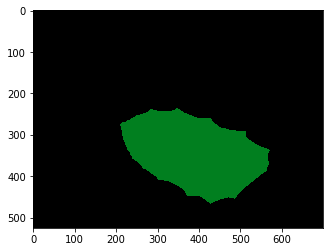

In [45]:
annotationRaw = np.array(Image.open('./data/SegmentationClassRaw/1248105728_0001.png')).astype(np.uint8)
print("class id raw image {0}".format(annotation[300][300]))

annotationImage = Image.open('./data/SegmentationClass/1248105728_0001.png')
annotation = np.array(annotationImage).astype(np.uint8)

print("class id colored image {0}".format(annotationRaw[300][300]))
plt.imshow(annotationImage)


create train and val file list (90% train / 10%val) randomly shuffeld in the data folder

In [57]:
import random
import glob

path='./data/images/*'
names=[]
filelist = sorted(glob.glob(path))
for file in filelist:
    substr = file[:-4]
    substrs = substr.split('/')
    names.append(substrs[len(substrs)-1]+'\n')

random.shuffle(names)

trainlinesCount = int(len(names)*0.9)
vallinesCount = len(names) - trainlinesCount

print("names:{} train:{} val:{}".format(len(names),trainlinesCount,vallinesCount))

with open("./data/train.txt", "w") as f:
    f.writelines(names[:trainlinesCount])
with open("./data/val.txt", "w") as f:
    f.writelines(names[trainlinesCount:])
    

names:7719 train:6947 val:772


create the tfrecord dataset for the tensorflow model traing. Images are sized to 512x512


In [49]:
!python build_leaf_data.py



W0305 12:31:15.858141 139968020395840 deprecation_wrapper.py:119] From build_leaf_data.py:162: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.


W0305 12:31:15.937208 139968020395840 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/build_data.py:63: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0305 12:31:15.938236 139968020395840 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/build_data.py:65: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-03-05 12:31:15.939039: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-03-05 12:31:15.960241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning 

>> Converting image 1737/6947 shard 0
>> Converting image 3474/6947 shard 1
>> Converting image 5211/6947 shard 2
>> Converting image 6947/6947 shard 3
2020-03-05 12:34:20.467284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-05 12:34:20.470083: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: GeForce GTX 1060 6GB major: 6 minor: 1 memoryClockRate(GHz): 1.7085
pciBusID: 0000:01:00.0
2020-03-05 12:34:20.470154: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.9.2
2020-03-05 12:34:20.470174: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.9.2
2020-03-05 12:34:20.470189: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic li

Clone tensorflow models

In [50]:
!git clone https://github.com/tensorflow/models.git

Klone nach 'models' ...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 34357 (delta 1), reused 14 (delta 0), pack-reused 34340
Empfange Objekte: 100% (34357/34357), 511.98 MiB | 10.06 MiB/s, Fertig.
Löse Unterschiede auf: 100% (22050/22050), Fertig.


copy files needed to train our own model on the leaf tfrecord dataset

In [52]:
!cp local_leaf_train_test.sh models/research/deeplab/;cp data_generator.py models/research/deeplab/datasets/

start the training (3000 steps)

In [56]:
!cd models/research/deeplab;ls;./local_leaf_train_test.sh

common.py	    eval.py		 local_leaf_train_test.sh   testing
common_test.py	    evaluation		 local_test_mobilenetv2.sh  train.py
core		    export_model.py	 local_test.sh		    utils
datasets	    g3doc		 model.py		    vis.py
deeplab_demo.ipynb  __init__.py		 model_test.py
deprecated	    input_preprocess.py  README.md
--2020-03-05 12:52:43--  http://download.tensorflow.org/models/deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
Auflösen des Hostnamens download.tensorflow.org (download.tensorflow.org) … 216.58.210.16, 2a00:1450:4001:816::2010
Verbindungsaufbau zu download.tensorflow.org (download.tensorflow.org)|216.58.210.16|:80 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 23882985 (23M) [application/x-tar]
Wird in »deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz« gespeichert.

deeplabv3_mnv2_pasc 100%[===================>]  22,78M  10,0MB/s    in 2,3s    

2020-03-05 12:52:46 (10,0 MB/s) - »deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz« gespeiche


W0305 12:52:49.472888 140464122214208 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/datasets/data_generator.py:231: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.


W0305 12:52:49.473111 140464122214208 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/datasets/data_generator.py:246: The name tf.parse_single_example is deprecated. Please use tf.io.parse_single_example instead.

2020-03-05 12:52:49.495355: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-03-05 12:52:49.518999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-05 12:52:49.519322: I tensorflow/core/common_runtime/g


W0305 12:52:54.621213 140464122214208 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/train.py:424: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

INFO:tensorflow:Initializing model from path: /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/datasets/leaf_voc_seg/init_models/deeplabv3_mnv2_pascal_train_aug/model.ckpt-30000
I0305 12:52:54.628140 140464122214208 train_utils.py:207] Initializing model from path: /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/datasets/leaf_voc_seg/init_models/deeplabv3_mnv2_pascal_train_aug/model.ckpt-30000
W0305 12:52:54.950491 140464122214208 variables.py:676] Checkpoint is missing variable [decoder/feature_projection0/weights]
W0305 12:52:54.950647 140464122214208 variables.py:676] Checkpoint is missing variable [decoder/feature_projection0/Batch

Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
W0305 12:52:55.887423 140464122214208 deprecation.py:323] From /home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/contrib/slim/python/slim/learning.py:742: Supervisor.__init__ (from tensorflow.python.training.supervisor) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
2020-03-05 12:52:56.248811: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-03-05 12:52:56.269804: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2712000000 Hz
2020-03-05 12:52:56.270006: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560b47df67b0 executing computations on platform Host. Devices:
2020-03-05 12:52:56.270019: I tensorflow/compiler/xla/service/service.cc:175]   Stream

INFO:tensorflow:global step 20: loss = 4.0149 (0.448 sec/step)
I0305 12:53:17.892215 140464122214208 learning.py:507] global step 20: loss = 4.0149 (0.448 sec/step)
INFO:tensorflow:global step 30: loss = 3.0979 (0.455 sec/step)
I0305 12:53:22.387796 140464122214208 learning.py:507] global step 30: loss = 3.0979 (0.455 sec/step)
INFO:tensorflow:global step 40: loss = 1.8341 (0.433 sec/step)
I0305 12:53:26.967189 140464122214208 learning.py:507] global step 40: loss = 1.8341 (0.433 sec/step)
INFO:tensorflow:global step 50: loss = 1.1772 (0.445 sec/step)
I0305 12:53:31.456768 140464122214208 learning.py:507] global step 50: loss = 1.1772 (0.445 sec/step)
INFO:tensorflow:global step 60: loss = 2.0951 (0.432 sec/step)
I0305 12:53:35.881535 140464122214208 learning.py:507] global step 60: loss = 2.0951 (0.432 sec/step)
INFO:tensorflow:global step 70: loss = 2.3311 (0.454 sec/step)
I0305 12:53:40.290785 140464122214208 learning.py:507] global step 70: loss = 2.3311 (0.454 sec/step)
INFO:tenso

INFO:tensorflow:global step 520: loss = 0.3035 (0.459 sec/step)
I0305 12:57:02.429814 140464122214208 learning.py:507] global step 520: loss = 0.3035 (0.459 sec/step)
INFO:tensorflow:global step 530: loss = 0.4857 (0.448 sec/step)
I0305 12:57:06.900801 140464122214208 learning.py:507] global step 530: loss = 0.4857 (0.448 sec/step)
INFO:tensorflow:global step 540: loss = 0.4034 (0.443 sec/step)
I0305 12:57:11.371920 140464122214208 learning.py:507] global step 540: loss = 0.4034 (0.443 sec/step)
INFO:tensorflow:global step 550: loss = 0.2802 (0.439 sec/step)
I0305 12:57:15.828510 140464122214208 learning.py:507] global step 550: loss = 0.2802 (0.439 sec/step)
INFO:tensorflow:global step 560: loss = 0.2202 (0.428 sec/step)
I0305 12:57:20.237618 140464122214208 learning.py:507] global step 560: loss = 0.2202 (0.428 sec/step)
INFO:tensorflow:global step 570: loss = 0.3174 (0.472 sec/step)
I0305 12:57:24.752727 140464122214208 learning.py:507] global step 570: loss = 0.3174 (0.472 sec/step

INFO:tensorflow:global step 1020: loss = 0.2391 (0.438 sec/step)
I0305 13:00:47.545888 140464122214208 learning.py:507] global step 1020: loss = 0.2391 (0.438 sec/step)
INFO:tensorflow:global step 1030: loss = 0.4047 (0.436 sec/step)
I0305 13:00:52.108909 140464122214208 learning.py:507] global step 1030: loss = 0.4047 (0.436 sec/step)
INFO:tensorflow:global step 1040: loss = 0.2226 (0.453 sec/step)
I0305 13:00:56.661976 140464122214208 learning.py:507] global step 1040: loss = 0.2226 (0.453 sec/step)
INFO:tensorflow:global step 1050: loss = 0.2540 (0.444 sec/step)
I0305 13:01:01.181710 140464122214208 learning.py:507] global step 1050: loss = 0.2540 (0.444 sec/step)
INFO:tensorflow:global step 1060: loss = 0.1683 (0.454 sec/step)
I0305 13:01:05.735868 140464122214208 learning.py:507] global step 1060: loss = 0.1683 (0.454 sec/step)
INFO:tensorflow:global step 1070: loss = 0.2219 (0.470 sec/step)
I0305 13:01:10.222701 140464122214208 learning.py:507] global step 1070: loss = 0.2219 (0.

INFO:tensorflow:global step 1490: loss = 0.2457 (0.427 sec/step)
I0305 13:04:19.969221 140464122214208 learning.py:507] global step 1490: loss = 0.2457 (0.427 sec/step)
INFO:tensorflow:global step 1500: loss = 0.1618 (0.452 sec/step)
I0305 13:04:24.457968 140464122214208 learning.py:507] global step 1500: loss = 0.1618 (0.452 sec/step)
INFO:tensorflow:global step 1510: loss = 0.1975 (0.452 sec/step)
I0305 13:04:28.976431 140464122214208 learning.py:507] global step 1510: loss = 0.1975 (0.452 sec/step)
INFO:tensorflow:global step 1520: loss = 0.2319 (0.438 sec/step)
I0305 13:04:33.445952 140464122214208 learning.py:507] global step 1520: loss = 0.2319 (0.438 sec/step)
INFO:tensorflow:global step 1530: loss = 0.1810 (0.429 sec/step)
I0305 13:04:37.970929 140464122214208 learning.py:507] global step 1530: loss = 0.1810 (0.429 sec/step)
INFO:tensorflow:global step 1540: loss = 0.2076 (0.458 sec/step)
I0305 13:04:42.461459 140464122214208 learning.py:507] global step 1540: loss = 0.2076 (0.

INFO:tensorflow:global step 1980: loss = 0.1556 (0.449 sec/step)
I0305 13:08:00.746177 140464122214208 learning.py:507] global step 1980: loss = 0.1556 (0.449 sec/step)
INFO:tensorflow:global step 1990: loss = 0.1546 (0.445 sec/step)
I0305 13:08:05.209160 140464122214208 learning.py:507] global step 1990: loss = 0.1546 (0.445 sec/step)
INFO:tensorflow:global step 2000: loss = 0.2939 (0.457 sec/step)
I0305 13:08:09.699866 140464122214208 learning.py:507] global step 2000: loss = 0.2939 (0.457 sec/step)
INFO:tensorflow:global step 2010: loss = 0.2887 (0.464 sec/step)
I0305 13:08:14.179589 140464122214208 learning.py:507] global step 2010: loss = 0.2887 (0.464 sec/step)
INFO:tensorflow:global step 2020: loss = 0.1912 (0.442 sec/step)
I0305 13:08:18.692452 140464122214208 learning.py:507] global step 2020: loss = 0.1912 (0.442 sec/step)
INFO:tensorflow:global step 2030: loss = 0.2185 (0.455 sec/step)
I0305 13:08:23.182632 140464122214208 learning.py:507] global step 2030: loss = 0.2185 (0.

INFO:tensorflow:global step 2470: loss = 0.1658 (0.429 sec/step)
I0305 13:11:41.325046 140464122214208 learning.py:507] global step 2470: loss = 0.1658 (0.429 sec/step)
INFO:tensorflow:global step 2480: loss = 0.2026 (0.443 sec/step)
I0305 13:11:45.830574 140464122214208 learning.py:507] global step 2480: loss = 0.2026 (0.443 sec/step)
INFO:tensorflow:global step 2490: loss = 0.1919 (0.454 sec/step)
I0305 13:11:50.405383 140464122214208 learning.py:507] global step 2490: loss = 0.1919 (0.454 sec/step)
INFO:tensorflow:global step 2500: loss = 0.1939 (0.465 sec/step)
I0305 13:11:54.994936 140464122214208 learning.py:507] global step 2500: loss = 0.1939 (0.465 sec/step)
INFO:tensorflow:global step 2510: loss = 0.1385 (0.451 sec/step)
I0305 13:11:59.436315 140464122214208 learning.py:507] global step 2510: loss = 0.1385 (0.451 sec/step)
INFO:tensorflow:global step 2520: loss = 0.2681 (0.441 sec/step)
I0305 13:12:03.955490 140464122214208 learning.py:507] global step 2520: loss = 0.2681 (0.

INFO:tensorflow:global step 2920: loss = 0.3750 (0.449 sec/step)
I0305 13:15:04.251980 140464122214208 learning.py:507] global step 2920: loss = 0.3750 (0.449 sec/step)
INFO:tensorflow:global step 2930: loss = 0.1987 (0.447 sec/step)
I0305 13:15:08.725214 140464122214208 learning.py:507] global step 2930: loss = 0.1987 (0.447 sec/step)
INFO:tensorflow:global step 2940: loss = 0.2460 (0.459 sec/step)
I0305 13:15:13.218733 140464122214208 learning.py:507] global step 2940: loss = 0.2460 (0.459 sec/step)
INFO:tensorflow:global step 2950: loss = 0.1969 (0.458 sec/step)
I0305 13:15:17.773503 140464122214208 learning.py:507] global step 2950: loss = 0.1969 (0.458 sec/step)
INFO:tensorflow:global step 2960: loss = 0.2244 (0.428 sec/step)
I0305 13:15:22.234590 140464122214208 learning.py:507] global step 2960: loss = 0.2244 (0.428 sec/step)
INFO:tensorflow:global step 2970: loss = 0.2013 (0.460 sec/step)
I0305 13:15:26.801190 140464122214208 learning.py:507] global step 2970: loss = 0.2013 (0.

2020-03-05 13:15:43.531153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-05 13:15:43.531462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: GeForce GTX 1060 6GB major: 6 minor: 1 memoryClockRate(GHz): 1.7085
pciBusID: 0000:01:00.0
2020-03-05 13:15:43.531622: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.9.2
2020-03-05 13:15:43.532402: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.9.2
2020-03-05 13:15:43.533131: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcufft.so.9.2
2020-03-05 13:15:43.533305: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library li


W0305 13:15:46.888923 139651312310080 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/eval.py:191: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.compat.v1.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must 

67 ops no flops stats due to incomplete shapes.
Parsing Inputs...

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.
flops: Number of float operations. N

INFO:tensorflow:Graph was finalized.
I0305 13:15:48.301425 139651312310080 monitored_session.py:240] Graph was finalized.
2020-03-05 13:15:48.301745: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-03-05 13:15:48.325813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2712000000 Hz
2020-03-05 13:15:48.326038: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ab19d04ca0 executing computations on platform Host. Devices:
2020-03-05 13:15:48.326060: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2020-03-05 13:15:48.326252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-05 13:15:48.326556: I tensorflow/core/common_runtime/gp

/home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/frank/anaconda3/envs/py36/li


W0305 13:16:23.546859 139635256342336 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/core/utils.py:41: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.


W0305 13:16:23.792426 139635256342336 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/vis.py:276: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.

INFO:tensorflow:Waiting for new checkpoint at /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/datasets/leaf_voc_seg/exp/train_on_trainval_set/train
I0305 13:16:23.795338 139635256342336 evaluation.py:189] Waiting for new checkpoint at /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/datasets/leaf_voc_seg/exp/train_on_tr

2020-03-05 13:16:24.495951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1181] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-03-05 13:16:24.495977: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1187]      0 
2020-03-05 13:16:24.495985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1200] 0:   N 
2020-03-05 13:16:24.496135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-05 13:16:24.496483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-05 13:16:24.496787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

INFO:tensorflow:Visualizing batch 39
I0305 13:16:32.042194 139635256342336 vis.py:303] Visualizing batch 39
INFO:tensorflow:Visualizing batch 40
I0305 13:16:32.152932 139635256342336 vis.py:303] Visualizing batch 40
INFO:tensorflow:Visualizing batch 41
I0305 13:16:32.271306 139635256342336 vis.py:303] Visualizing batch 41
INFO:tensorflow:Visualizing batch 42
I0305 13:16:32.381055 139635256342336 vis.py:303] Visualizing batch 42
INFO:tensorflow:Visualizing batch 43
I0305 13:16:32.494461 139635256342336 vis.py:303] Visualizing batch 43
INFO:tensorflow:Visualizing batch 44
I0305 13:16:32.620981 139635256342336 vis.py:303] Visualizing batch 44
INFO:tensorflow:Visualizing batch 45
I0305 13:16:32.745127 139635256342336 vis.py:303] Visualizing batch 45
INFO:tensorflow:Visualizing batch 46
I0305 13:16:32.861686 139635256342336 vis.py:303] Visualizing batch 46
INFO:tensorflow:Visualizing batch 47
I0305 13:16:32.981425 139635256342336 vis.py:303] Visualizing batch 47
INFO:tensorflow:Visualizing 

INFO:tensorflow:Visualizing batch 115
I0305 13:16:40.862565 139635256342336 vis.py:303] Visualizing batch 115
INFO:tensorflow:Visualizing batch 116
I0305 13:16:40.973630 139635256342336 vis.py:303] Visualizing batch 116
INFO:tensorflow:Visualizing batch 117
I0305 13:16:41.095363 139635256342336 vis.py:303] Visualizing batch 117
INFO:tensorflow:Visualizing batch 118
I0305 13:16:41.214338 139635256342336 vis.py:303] Visualizing batch 118
INFO:tensorflow:Visualizing batch 119
I0305 13:16:41.326764 139635256342336 vis.py:303] Visualizing batch 119
INFO:tensorflow:Visualizing batch 120
I0305 13:16:41.444799 139635256342336 vis.py:303] Visualizing batch 120
INFO:tensorflow:Visualizing batch 121
I0305 13:16:41.563310 139635256342336 vis.py:303] Visualizing batch 121
INFO:tensorflow:Visualizing batch 122
I0305 13:16:41.687268 139635256342336 vis.py:303] Visualizing batch 122
INFO:tensorflow:Visualizing batch 123
I0305 13:16:41.798399 139635256342336 vis.py:303] Visualizing batch 123
INFO:tenso

INFO:tensorflow:Visualizing batch 190
I0305 13:16:49.689562 139635256342336 vis.py:303] Visualizing batch 190
INFO:tensorflow:Visualizing batch 191
I0305 13:16:49.805877 139635256342336 vis.py:303] Visualizing batch 191
INFO:tensorflow:Visualizing batch 192
I0305 13:16:49.924462 139635256342336 vis.py:303] Visualizing batch 192
INFO:tensorflow:Visualizing batch 193
I0305 13:16:50.049192 139635256342336 vis.py:303] Visualizing batch 193
INFO:tensorflow:Visualizing batch 194
I0305 13:16:50.174639 139635256342336 vis.py:303] Visualizing batch 194
INFO:tensorflow:Visualizing batch 195
I0305 13:16:50.295891 139635256342336 vis.py:303] Visualizing batch 195
INFO:tensorflow:Visualizing batch 196
I0305 13:16:50.409512 139635256342336 vis.py:303] Visualizing batch 196
INFO:tensorflow:Visualizing batch 197
I0305 13:16:50.523049 139635256342336 vis.py:303] Visualizing batch 197
INFO:tensorflow:Visualizing batch 198
I0305 13:16:50.642327 139635256342336 vis.py:303] Visualizing batch 198
INFO:tenso

INFO:tensorflow:Visualizing batch 265
I0305 13:16:58.491247 139635256342336 vis.py:303] Visualizing batch 265
INFO:tensorflow:Visualizing batch 266
I0305 13:16:58.607772 139635256342336 vis.py:303] Visualizing batch 266
INFO:tensorflow:Visualizing batch 267
I0305 13:16:58.720729 139635256342336 vis.py:303] Visualizing batch 267
INFO:tensorflow:Visualizing batch 268
I0305 13:16:58.847872 139635256342336 vis.py:303] Visualizing batch 268
INFO:tensorflow:Visualizing batch 269
I0305 13:16:58.966687 139635256342336 vis.py:303] Visualizing batch 269
INFO:tensorflow:Visualizing batch 270
I0305 13:16:59.082921 139635256342336 vis.py:303] Visualizing batch 270
INFO:tensorflow:Visualizing batch 271
I0305 13:16:59.197455 139635256342336 vis.py:303] Visualizing batch 271
INFO:tensorflow:Visualizing batch 272
I0305 13:16:59.319897 139635256342336 vis.py:303] Visualizing batch 272
INFO:tensorflow:Visualizing batch 273
I0305 13:16:59.432576 139635256342336 vis.py:303] Visualizing batch 273
INFO:tenso

INFO:tensorflow:Visualizing batch 340
I0305 13:17:07.292272 139635256342336 vis.py:303] Visualizing batch 340
INFO:tensorflow:Visualizing batch 341
I0305 13:17:07.409163 139635256342336 vis.py:303] Visualizing batch 341
INFO:tensorflow:Visualizing batch 342
I0305 13:17:07.524469 139635256342336 vis.py:303] Visualizing batch 342
INFO:tensorflow:Visualizing batch 343
I0305 13:17:07.637675 139635256342336 vis.py:303] Visualizing batch 343
INFO:tensorflow:Visualizing batch 344
I0305 13:17:07.760147 139635256342336 vis.py:303] Visualizing batch 344
INFO:tensorflow:Visualizing batch 345
I0305 13:17:07.878498 139635256342336 vis.py:303] Visualizing batch 345
INFO:tensorflow:Visualizing batch 346
I0305 13:17:08.009799 139635256342336 vis.py:303] Visualizing batch 346
INFO:tensorflow:Visualizing batch 347
I0305 13:17:08.121334 139635256342336 vis.py:303] Visualizing batch 347
INFO:tensorflow:Visualizing batch 348
I0305 13:17:08.249557 139635256342336 vis.py:303] Visualizing batch 348
INFO:tenso

INFO:tensorflow:Visualizing batch 415
I0305 13:17:16.063535 139635256342336 vis.py:303] Visualizing batch 415
INFO:tensorflow:Visualizing batch 416
I0305 13:17:16.179062 139635256342336 vis.py:303] Visualizing batch 416
INFO:tensorflow:Visualizing batch 417
I0305 13:17:16.299318 139635256342336 vis.py:303] Visualizing batch 417
INFO:tensorflow:Visualizing batch 418
I0305 13:17:16.426473 139635256342336 vis.py:303] Visualizing batch 418
INFO:tensorflow:Visualizing batch 419
I0305 13:17:16.540975 139635256342336 vis.py:303] Visualizing batch 419
INFO:tensorflow:Visualizing batch 420
I0305 13:17:16.663142 139635256342336 vis.py:303] Visualizing batch 420
INFO:tensorflow:Visualizing batch 421
I0305 13:17:16.765044 139635256342336 vis.py:303] Visualizing batch 421
INFO:tensorflow:Visualizing batch 422
I0305 13:17:16.884793 139635256342336 vis.py:303] Visualizing batch 422
INFO:tensorflow:Visualizing batch 423
I0305 13:17:17.001401 139635256342336 vis.py:303] Visualizing batch 423
INFO:tenso

INFO:tensorflow:Visualizing batch 490
I0305 13:17:24.832182 139635256342336 vis.py:303] Visualizing batch 490
INFO:tensorflow:Visualizing batch 491
I0305 13:17:24.942567 139635256342336 vis.py:303] Visualizing batch 491
INFO:tensorflow:Visualizing batch 492
I0305 13:17:25.024780 139635256342336 vis.py:303] Visualizing batch 492
INFO:tensorflow:Visualizing batch 493
I0305 13:17:25.145946 139635256342336 vis.py:303] Visualizing batch 493
INFO:tensorflow:Visualizing batch 494
I0305 13:17:25.255634 139635256342336 vis.py:303] Visualizing batch 494
INFO:tensorflow:Visualizing batch 495
I0305 13:17:25.381466 139635256342336 vis.py:303] Visualizing batch 495
INFO:tensorflow:Visualizing batch 496
I0305 13:17:25.499798 139635256342336 vis.py:303] Visualizing batch 496
INFO:tensorflow:Visualizing batch 497
I0305 13:17:25.609140 139635256342336 vis.py:303] Visualizing batch 497
INFO:tensorflow:Visualizing batch 498
I0305 13:17:25.732194 139635256342336 vis.py:303] Visualizing batch 498
INFO:tenso

INFO:tensorflow:Visualizing batch 565
I0305 13:17:33.415713 139635256342336 vis.py:303] Visualizing batch 565
INFO:tensorflow:Visualizing batch 566
I0305 13:17:33.541692 139635256342336 vis.py:303] Visualizing batch 566
INFO:tensorflow:Visualizing batch 567
I0305 13:17:33.657682 139635256342336 vis.py:303] Visualizing batch 567
INFO:tensorflow:Visualizing batch 568
I0305 13:17:33.774738 139635256342336 vis.py:303] Visualizing batch 568
INFO:tensorflow:Visualizing batch 569
I0305 13:17:33.885034 139635256342336 vis.py:303] Visualizing batch 569
INFO:tensorflow:Visualizing batch 570
I0305 13:17:34.010330 139635256342336 vis.py:303] Visualizing batch 570
INFO:tensorflow:Visualizing batch 571
I0305 13:17:34.121524 139635256342336 vis.py:303] Visualizing batch 571
INFO:tensorflow:Visualizing batch 572
I0305 13:17:34.233994 139635256342336 vis.py:303] Visualizing batch 572
INFO:tensorflow:Visualizing batch 573
I0305 13:17:34.362822 139635256342336 vis.py:303] Visualizing batch 573
INFO:tenso

INFO:tensorflow:Visualizing batch 640
I0305 13:17:42.109444 139635256342336 vis.py:303] Visualizing batch 640
INFO:tensorflow:Visualizing batch 641
I0305 13:17:42.236843 139635256342336 vis.py:303] Visualizing batch 641
INFO:tensorflow:Visualizing batch 642
I0305 13:17:42.356482 139635256342336 vis.py:303] Visualizing batch 642
INFO:tensorflow:Visualizing batch 643
I0305 13:17:42.471456 139635256342336 vis.py:303] Visualizing batch 643
INFO:tensorflow:Visualizing batch 644
I0305 13:17:42.578092 139635256342336 vis.py:303] Visualizing batch 644
INFO:tensorflow:Visualizing batch 645
I0305 13:17:42.691029 139635256342336 vis.py:303] Visualizing batch 645
INFO:tensorflow:Visualizing batch 646
I0305 13:17:42.770015 139635256342336 vis.py:303] Visualizing batch 646
INFO:tensorflow:Visualizing batch 647
I0305 13:17:42.893704 139635256342336 vis.py:303] Visualizing batch 647
INFO:tensorflow:Visualizing batch 648
I0305 13:17:43.009117 139635256342336 vis.py:303] Visualizing batch 648
INFO:tenso

INFO:tensorflow:Visualizing batch 715
I0305 13:17:50.757520 139635256342336 vis.py:303] Visualizing batch 715
INFO:tensorflow:Visualizing batch 716
I0305 13:17:50.869609 139635256342336 vis.py:303] Visualizing batch 716
INFO:tensorflow:Visualizing batch 717
I0305 13:17:50.946445 139635256342336 vis.py:303] Visualizing batch 717
INFO:tensorflow:Visualizing batch 718
I0305 13:17:51.068673 139635256342336 vis.py:303] Visualizing batch 718
INFO:tensorflow:Visualizing batch 719
I0305 13:17:51.181246 139635256342336 vis.py:303] Visualizing batch 719
INFO:tensorflow:Visualizing batch 720
I0305 13:17:51.299267 139635256342336 vis.py:303] Visualizing batch 720
INFO:tensorflow:Visualizing batch 721
I0305 13:17:51.421482 139635256342336 vis.py:303] Visualizing batch 721
INFO:tensorflow:Visualizing batch 722
I0305 13:17:51.526894 139635256342336 vis.py:303] Visualizing batch 722
INFO:tensorflow:Visualizing batch 723
I0305 13:17:51.638529 139635256342336 vis.py:303] Visualizing batch 723
INFO:tenso

/home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/frank/anaconda3/envs/py36/li


W0305 13:18:02.443177 140611520251712 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/export_model.py:181: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0305 13:18:02.443359 140611520251712 deprecation_wrapper.py:119] From /home/frank/Raspberry-Robotics101/projects/DC-Box/tensorflow/deeplab/models/research/deeplab/export_model.py:182: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

Instructions for updating:
Use standard file APIs to check for files with this prefix.
W0305 13:18:02.525011 140611520251712 deprecation.py:323] From /home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/tools/freeze_graph.py:127: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for 

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0305 13:18:03.814160 140611520251712 deprecation.py:323] From /home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/tools/freeze_graph.py:233: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
W0305 13:18:03.814327 140611520251712 deprecation.py:323] From /home/frank/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 297 variables.
I0305 13:18:04.032399 14061152025

convert the model to IR openvino. It is copied to the DC-Box/openvion folder

In [ ]:
!./openvinoConvertScript.sh